In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ahmed\anaconda3\envs\neuralnetwork\nltk_data.
[nltk_data]     ..
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ahmed\anaconda3\envs\neuralnetwork\nltk_data.
[nltk_data]     ..
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('IMDB Dataset.csv')

# Preview the dataset
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Data Preprocessing (Cleaning Text)
# Removing unnecessary columns and handling missing values

df = df[['review', 'sentiment']]  # Keep only relevant columns
df.dropna(inplace=True)  # Drop rows with missing values

# Convert sentiment labels to binary (Positive = 1, Negative = 0)
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Display the cleaned data
df.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [4]:
# Text Tokenization and Stopwords Removal

stop_words = set(stopwords.words('english'))

# Function to clean and tokenize reviews
def preprocess_review(review):
    words = word_tokenize(review.lower())  # Tokenize and lower case the text
    return ' '.join([word for word in words if word.isalnum() and word not in stop_words])

df['cleaned_review'] = df['review'].apply(preprocess_review)

# Preview the cleaned reviews
df.head()


,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,1,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...


In [5]:
# Feature Extraction (Bag of Words Model)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shape of the resulting data
X_train.shape, X_test.shape


((35000, 98524), (15000, 98524))

In [6]:
# Model Training (Naive Bayes)
model = MultinomialNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 85.81%


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      7411
           1       0.88      0.84      0.86      7589

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



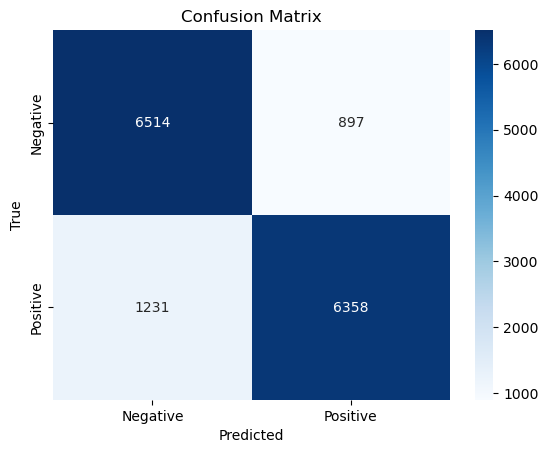

In [7]:
# Model Evaluation

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Example usage:
# New review prediction
new_review = "This product is not very good"
new_review = preprocess_review(new_review)
new_review_vectorized = vectorizer.transform([new_review])
prediction = model.predict(new_review_vectorized)

print("Sentiment:", "Positive" if prediction == 1 else "Negative")

Sentiment: Negative
